In [97]:
import pandas as pd
import pylab
#import seaborn as sn
import numpy as np
#import matplotlib as plt
%matplotlib inline

Our research question is **Are most of the Mars craters created by foreign body impact?** 
To answer it I will use following variables:
* crater size (DIAM_CIRCLE_IMAGE, DEPTH_RIMFLOOR_TOPOG) in km
* additional information of the crater structure (NUMBER_LAYERS), identifying how many layers can we recognise.
* and the spatial locaton of the crater (LONGITUDE_CIRCLE_IMAGE, LATITUDE_CIRCLE_IMAGE) in degrees (North-South, East-West). 


##Making Data Management Decisions

Last week we modified following variables:
* remove all DIAM_CIRCLE_IMAGE values above the treshold level - there is a small number of massive craters, making analysis difficult
* remove all DEPTH_RIMFLOOR_TOPOG>=0. I assume for now that those are unlikely to be created due to impact.
* we apply threshold level of 2 to DEPTH_RIMFLOOR_TOPOG

In [98]:
data = pd.read_csv('marscrater_pds.csv', low_memory=False,na_values = [" "])

tresholdLevel = 5 #this is in km
#data.DIAM_CIRCLE_IMAGE = data.DIAM_CIRCLE_IMAGE[data.DIAM_CIRCLE_IMAGE<tresholdLevel]#this will give NAs
data = data[data.DIAM_CIRCLE_IMAGE<tresholdLevel] #this will clean dataset (drop whole row)
print data['DIAM_CIRCLE_IMAGE'].describe()

data = data[(data.DEPTH_RIMFLOOR_TOPOG>=0) & (data.DEPTH_RIMFLOOR_TOPOG<1) ] 
print data.DEPTH_RIMFLOOR_TOPOG.describe()


count    336745.000000
mean          1.734312
std           0.831459
min           1.000000
25%           1.160000
50%           1.410000
75%           1.990000
max           4.990000
Name: DIAM_CIRCLE_IMAGE, dtype: float64
count    336743.000000
mean          0.021388
std           0.082888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.970000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64


In [99]:
# create a new dataframe with percentage population of columns in client dataframe
columns = ["Field name","Percent filled"]
dataFillInformation = pd.DataFrame(columns = columns)

craterDimensions= ['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']
craterLocation = ['LONGITUDE_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE']


for column in craterDimensions+craterLocation:
    null = data[column].notnull().sum()
    percent_not_null = (null/float(len(data))*100)
    new_row = pd.DataFrame({"Field name": [column], "Percent filled": [percent_not_null]})
    dataFillInformation = pd.concat([dataFillInformation,new_row])
dataFillInformation
#data.info()


,Field name,Percent filled
0,DIAM_CIRCLE_IMAGE,100
0,DEPTH_RIMFLOOR_TOPOG,100
0,LONGITUDE_CIRCLE_IMAGE,100
0,LATITUDE_CIRCLE_IMAGE,100


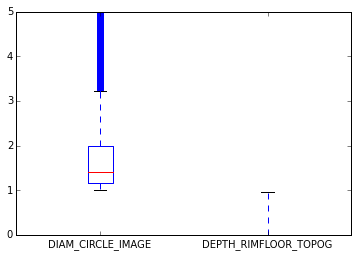

In [100]:
data[craterDimensions].plot(kind='box')
#data.DEPTH_RIMFLOOR_TOPOG.plot(kind='hist')
#data.DIAM_CIRCLE_IMAGE.plot(kind='hist')

Last operation removed all rows with NAs from dataset.
##Creating Secondary Variable
Quick analysis of crater size variables show a correlation between size (radius) and depth of the crater. To simplfy future analysis we will create a new variable, describing volume of the crater trearing it as cylinder that is $V=hr^2\pi $

count    336743.000000
mean          0.915773
std           4.232606
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.944156
dtype: float64


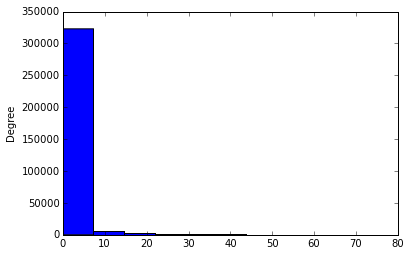

In [101]:
from math import pi
data.volume = data.DIAM_CIRCLE_IMAGE**2 * data.DEPTH_RIMFLOOR_TOPOG * pi


#data.volume.plot(kind='box')
data.volume.plot(kind='hist')
print data.volume.describe()


We are considering using NUMBER_LAYERS as well. Lets see how this variable correlated with volume.

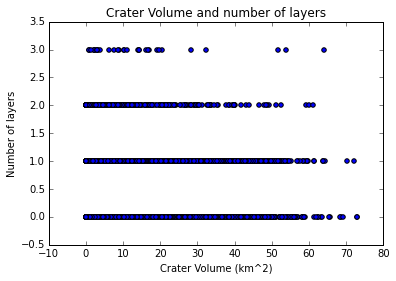

In [102]:
plt.scatter(data.volume,data.NUMBER_LAYERS)
plt.title("Crater Volume and number of layers")
plt.xlabel("Crater Volume (km^2)")
plt.ylabel("Number of layers")
plt.show()

Above suggest that this variable will not be useful for our analysis.

In [103]:
craterDimensions= ['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']
craterLocation = ['LONGITUDE_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE']
for column in  craterDimensions:
    print "\nStatistics for variable %s" %column
    print data[column].describe()



Statistics for variable DIAM_CIRCLE_IMAGE
count    336743.000000
mean          1.734292
std           0.831423
min           1.000000
25%           1.160000
50%           1.410000
75%           1.990000
max           4.990000
Name: DIAM_CIRCLE_IMAGE, dtype: float64

Statistics for variable DEPTH_RIMFLOOR_TOPOG
count    336743.000000
mean          0.021388
std           0.082888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.970000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64


There seems to be a few very large values in DIAM_CIRCLE_IMAGE. Lets check if we can safely remove them.

In [104]:
tresholdLevel = 50 #this is in km
largeValues = data.DIAM_CIRCLE_IMAGE[data.DIAM_CIRCLE_IMAGE>tresholdLevel].value_counts(sort=True).sum()
print "We got %i records above %.1fkm, which is %.3f%% of total data." %(largeValues,tresholdLevel, largeValues/float(len(data))*100)

We got 0 records above 50.0km, which is 0.000% of total data.


I assume those to be outlayers (massive old craters) and disregard them from future analysis, as overal number is small.

##Visualisation of distribution
Lets visualise our crater dimensions distribution now.

Is there a correlation between depth and size of crater?

This looks promissing lets check spatial distribution of our data now

##Summary

This week anlysis reduced number of data,  making it more meaningful to our our hypothesis. Two plots below demonstrate just that. Most interestingly, our crater dimensions plot looks different now.


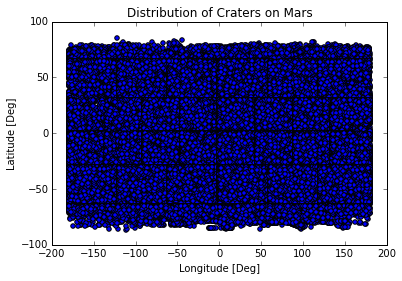

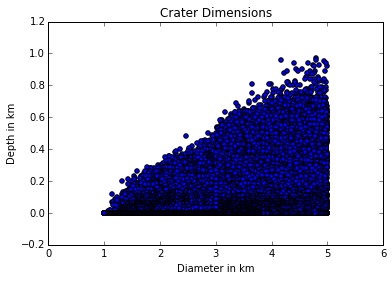

In [105]:
plt.scatter(data.LONGITUDE_CIRCLE_IMAGE,data.LATITUDE_CIRCLE_IMAGE)
plt.title("Distribution of Craters on Mars")
plt.xlabel("Longitude [Deg]")
plt.ylabel("Latitude [Deg]")
plt.show()

plt.scatter(data.DIAM_CIRCLE_IMAGE,data.DEPTH_RIMFLOOR_TOPOG)
plt.title("Crater Dimensions")
plt.xlabel("Diameter in km")
plt.ylabel("Depth in km")
plt.show()
